# 1. Data Preparation

In [135]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
%matplotlib inline
pyplot.rcParams['figure.figsize'] = (10, 6)

In [136]:
digits=load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [137]:
data=digits['data']
images=digits['images']
target=digits['target']
target_names=digits['target_names']

(8, 8)


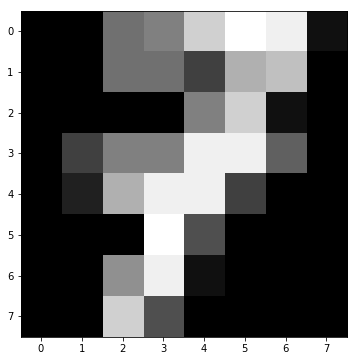

In [138]:
img = images[(np.where(target == 7)[0][0])]
print(img.shape)
plt.figure()
plt.gray()
plt.imshow(img,interpolation="nearest");

In [139]:
def filter_numbers(number1,number2):
    """Returns subset of digits sample data containing only the numbers passed to the function
        
       Takes number1 and number2 of the target_names as its arguments
       Returns two arrays: data, target
    """
    #if number1 and number2:
    if True:
        indices = np.where((digits['target'] == number1) | (digits['target'] == number2))
        #print(indices)
        data = (digits['data'])[indices]
        target = (digits['target'])[indices]
        #print(indices)
    return data, target

In [140]:
data17,target17=filter_numbers(1,7)
np.shape(data17)

(361, 64)

Split data in train and test set

In [141]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(data17,target17, test_size=0.2)

Plot the "mean" picture of both numbers.
Pixel [19] is nearly black for number 7 and white for number 1.
Also pixel [61] is black for number 7 and grey for number 1.

In [142]:
def mean_plot(number):
    img = np.mean([images[j] for j in range(len(images)) if target[j]==number], axis = 0)
    return img

def median_plot(number):
    img = np.median([images[j] for j in range(len(images)) if target[j]==number], axis = 0)
    return img

Text(0.5,1,'median')

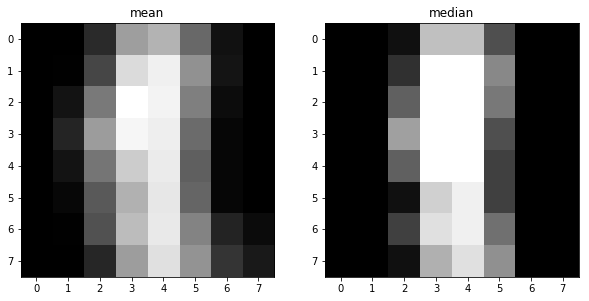

In [143]:
fig,ax=plt.subplots(1,2)
plt.gray()
ax[0].imshow(mean_plot(1))
ax[0].set_title("mean")
ax[1].imshow(median_plot(1))
ax[1].set_title("median")

Text(0.5,1,'median')

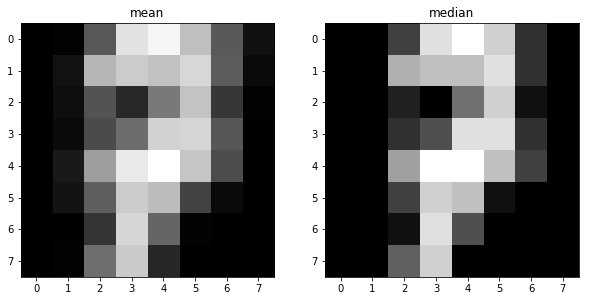

In [144]:
fig,ax=plt.subplots(1,2)
plt.gray()
ax[0].imshow(mean_plot(7))
ax[0].set_title("mean")
ax[1].imshow(median_plot(7))
ax[1].set_title("median")

In [145]:
print("Max difference mean: ",np.argmax(mean_plot(7)-mean_plot(1)))
print("Min difference mean: ",np.argmin(mean_plot(7)-mean_plot(1)))
print("Max difference median: ",np.argmax(median_plot(7)-median_plot(1)))
print("Min difference median: ",np.argmin(median_plot(7)-median_plot(1)))


Max difference mean:  10
Min difference mean:  19
Max difference median:  29
Min difference median:  19


### Dimension Reduction

In [146]:
def reduced_dim(x):
    res=np.empty([np.shape(x)[0],2])
    for i in range(len(x)):
        # Define the features here:
        
        res[i][0]=x[i][29]           # Feature 1
        res[i][1]=x[i][19]           # Feature 2
        
    return res

In [147]:
reduced_x=reduced_dim(X_train)
np.shape(reduced_x)

(288, 2)

In [148]:
# To differentiate in the scatter plot between the two classes

reduced1=[reduced_x[i] for i in range(len(reduced_x)) if target17[i]==1]
reduced7=[reduced_x[i] for i in range(len(reduced_x)) if target17[i]==7]

Text(0.5,1,'Dimension reduction - feature check')

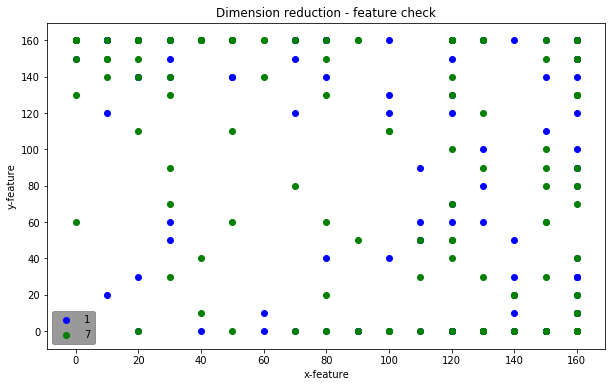

In [149]:
x1=[reduced1[i][0]*10 for i in range(len(reduced1))]
#x1=x1/np.max(x1)
y1=[reduced1[i][1]*10 for i in range(len(reduced1))]
#y1=y1/np.max(y1)
x7=[reduced7[i][0]*10 for i in range(len(reduced7))]
#x7=x7/np.max(x7)
y7=[reduced7[i][1]*10 for i in range(len(reduced7))]
#y7=y7/np.max(y7)
plt.scatter(x1,y1,color='b',label='1')
plt.scatter(x7,y7,color='g',label='7')

legend = plt.legend(frameon = 1)
frame = legend.get_frame()
frame.set_color('grey')

plt.xlabel("x-feature")
plt.ylabel('y-feature')
plt.title('Dimension reduction - feature check')

# 2. Nearest Mean

In [150]:
def nearest_mean(training_features, training_labels, test_features):
    mean1=np.empty([2,1])
    mean7=np.empty([2,1])
    mean1=sum([training_features[i] for i in range(\
        len(training_features)) if training_labels[i]==1])
    mean1=mean1/np.count_nonzero(training_labels==1)
    mean7=sum([training_features[i] for i in range(\
        len(training_features)) if training_labels[i]==7])
    mean7=mean7/np.count_nonzero(training_labels==7)
    predicted_labels=np.empty([len(test_features),1])
    for i in range(len(predicted_labels)):
        dis1=np.linalg.norm(mean1-test_features[i])
        dis2=np.linalg.norm(mean7-test_features[i])
        if dis1 <= dis2:
            predicted_labels[i]=1
        else:
            predicted_labels[i]=7
    return predicted_labels

In [151]:
reduced_test=reduced_dim(X_test)
predicted_labels=nearest_mean(reduced_x,y_train,reduced_test)
counter=0
for x,y in zip(predicted_labels,y_train):
    if x==y:
        counter+=1
print("Elements classified correctly: ",counter," (in Total: ",len(y_train)," elements.)")

Elements classified correctly:  36  (in Total:  288  elements.)


In [164]:
training_features=reduced_x
training_labels=y_train

data=np.meshgrid(np.arange(200),np.arange(200))
mean1=np.empty([2,1])
mean7=np.empty([2,1])
mean1 = np.mean([training_features[j] for j in range(len\
        (training_features)) if training_labels[j]==1], axis = 0)

mean7 = np.mean([training_features[j] for j in range(len\
        (training_features)) if training_labels[j]==7], axis = 0)


#mean1=sum([training_features[i] for i in range(\
#        len(training_features)) if training_labels[i]==1])
#mean1=mean1/np.count_nonzero(training_labels==1)
#mean7=sum([training_features[i] for i in range(\
#        len(training_features)) if training_labels[i]==7])
#mean7=mean7/np.count_nonzero(training_labels==7)
   
    
a=0
matrix=np.empty([200,200])
for i in range(200):
    for j in range(200):
        i_=i/10
        j_=j/10
        dis1=np.linalg.norm(mean1-np.array([i_,j_]))
        dis2=np.linalg.norm(mean7-np.array([i_,j_]))
        if dis1>dis2:
            a=0
        else:
            a=1
        matrix[i,j]=a

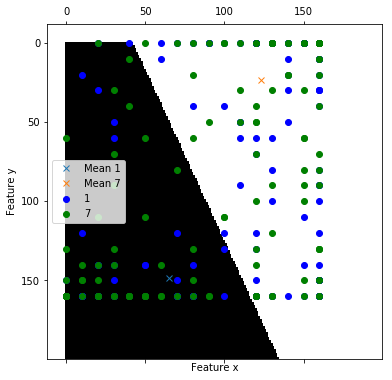

In [165]:
plt.matshow(matrix);
plt.plot(mean1[0]*10,mean1[1]*10,'x',label="Mean 1")
plt.plot(mean7[0]*10,mean7[1]*10,'x',label="Mean 7")

plt.xlabel("Feature x")
plt.ylabel("Feature y")
plt.scatter(x1,y1,color='b',label='1')
plt.scatter(x7,y7,color='g',label='7')
plt.legend(loc=6)
